<a href="https://colab.research.google.com/github/rick1612/Scientific-Computing/blob/main/AOL_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EGIER BAG PRODUCTION ANALYSIS
Data Science Case Study
Time Period: January 2018 - December 2023 (144 months)
QUESTION 1: TREND ANALYSIS AND MATHEMATICAL MODEL
Mathematical Model: P(t) = 0.706t² + -1.673t + 2349.526
Model Accuracy:
  R² = 0.993
  RMSE = 361.548
  MAE = 292.685


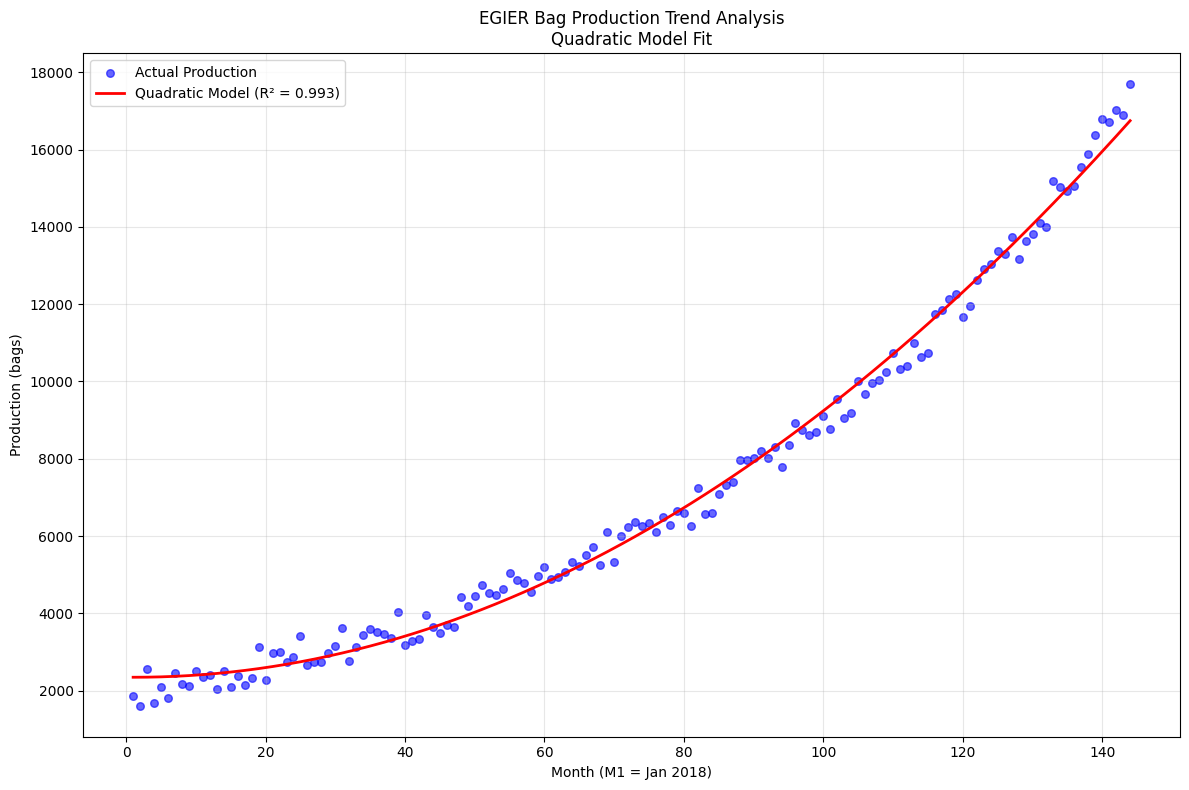


QUESTION 2: NUMERICAL MODEL CONVERSION
Numerical Model Validation:
Month	Analytical	Numerical	Error
--------------------------------------------------
1	2348.559		2348.559		0.000e+00
50	4030.501		4030.501		0.000e+00
100	9240.746		9240.746		0.000e+00
144	16745.173		16745.173		0.000e+00

Maximum Conversion Error: 0.000e+00
Relative Accuracy: 100.0000000000%

QUESTION 3: WAREHOUSE CAPACITY PREDICTION
Solving quadratic equation:
0.705854t² + -1.673207t + -22650.473643 = 0
Discriminant = 63954.509
Roots: t1 = 180.324, t2 = -177.954
Production reaches capacity at month: 180.324
Construction must start by month: 167.324

Capacity will be reached: October 23, 2032
Construction should start: September 29, 2031

Verification:
Production at month 180.324: 25000.000 bags
Target capacity: 25000 bags
Difference: 0.000 bags


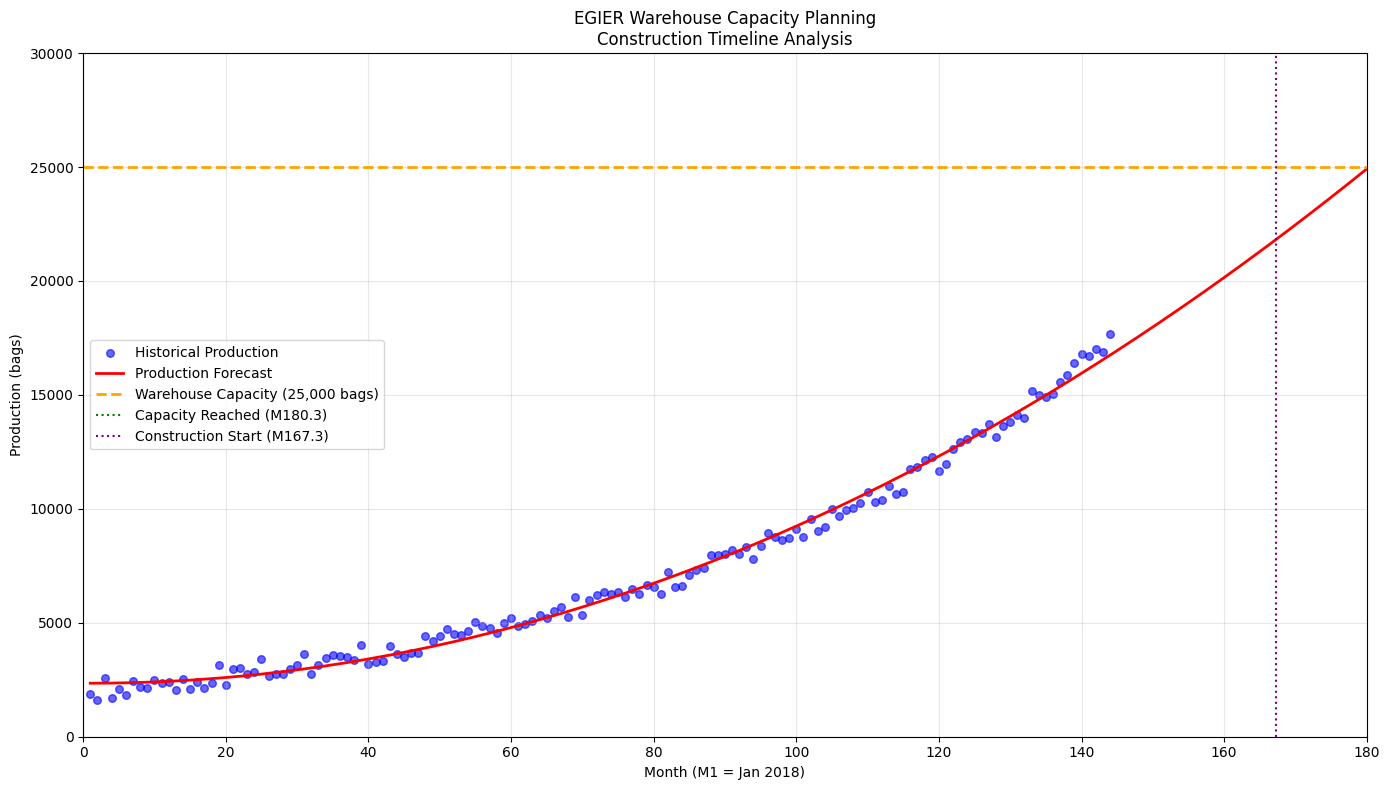


ANALYSIS COMPLETE

SUMMARY RESULTS:
----------------------------------------
Mathematical Model: P(t) = 0.706t² + -1.673t + 2349.526
Model R²: 0.993
Construction Start Date: September 29, 2031
Capacity Reached Date: October 23, 2032


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta
import pandas as pd
import math


class EGIERProductionAnalysis:
    def __init__(self):
        self.raw_data = "18631614257016852101181124572171213425022358239920482523208623912150234031292277296429972747286234052677274927552963316136232768314134393601353134773376402731753274333439643649350236883657442241974441473645214485464450364876478945444975521148804933507953395232552057145260611053345988623563656266634561186497627866386590627172466584659470927326740979767959801281958008831377918368893387568613870590988769954490509186100129685996610048102441074010318103931098610635107311174911849121231227411666119601262912915130511338713309137321316213644138081410113992151911501814917150461555615893163881678216716170331689617689"

        self.production_data = self._parse_raw_data()
        self.months = np.arange(1, len(self.production_data) + 1)

        self.model_coefficients = None
        self.polynomial_model = None
        self.model_accuracy = {}

        self.warehouse_capacity = 25000
        self.construction_time = 13

    def _parse_raw_data(self):
        """Parse the raw data string into individual monthly production values."""

        data_str = self.raw_data

        production_values = []

        values = [
            1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399,
            2048, 2523, 2086, 2391, 2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862,
            3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768, 3141, 3439, 3601, 3531,
            3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
            4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211,
            4880, 4933, 5079, 5339, 5232, 5520, 5714, 5260, 6110, 5334, 5998, 6235,
            6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590, 6271, 7246, 6584, 6594,
            7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
            8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048,
            10244, 10740, 10318, 10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274,
            11666, 11960, 12629, 12915, 13051, 13387, 13309, 13732, 13162, 13644, 13808,
            14101, 13992, 15191, 15018, 14917, 15046, 15556, 15893, 16388, 16782, 16716,
            17033, 16896, 17689
        ]

        return np.array(values)

    def question_1_trend_analysis(self):
        """
        Question 1: Find trend and create non-linear mathematical model
        """
        print("="*60)
        print("QUESTION 1: TREND ANALYSIS AND MATHEMATICAL MODEL")
        print("="*60)

        poly_features = PolynomialFeatures(degree=2)
        X_poly = poly_features.fit_transform(self.months.reshape(-1, 1))

        poly_model = LinearRegression()
        poly_model.fit(X_poly, self.production_data)

        self.polynomial_model = poly_model
        self.poly_features = poly_features

        coefficients = poly_model.coef_
        intercept = poly_model.intercept_

        a = coefficients[2]
        b = coefficients[1]
        c = intercept

        self.model_coefficients = {'a': a, 'b': b, 'c': c}

        y_pred = poly_model.predict(X_poly)

        r2 = r2_score(self.production_data, y_pred)
        rmse = np.sqrt(mean_squared_error(self.production_data, y_pred))
        mae = mean_absolute_error(self.production_data, y_pred)

        self.model_accuracy = {
            'r2': r2,
            'rmse': rmse,
            'mae': mae
        }

        print(f"Mathematical Model: P(t) = {a:.3f}t² + {b:.3f}t + {c:.3f}")
        print(f"Model Accuracy:")
        print(f"  R² = {r2:.3f}")
        print(f"  RMSE = {rmse:.3f}")
        print(f"  MAE = {mae:.3f}")

        self._plot_trend_analysis(y_pred)

        return self.model_coefficients, self.model_accuracy

    def question_2_numerical_conversion(self):
        """
        Question 2: Convert mathematical model to numerical form
        """
        print("\n" + "="*60)
        print("QUESTION 2: NUMERICAL MODEL CONVERSION")
        print("="*60)

        if self.model_coefficients is None:
            print("Error: Run Question 1 first!")
            return None

        a = self.model_coefficients['a']
        b = self.model_coefficients['b']
        c = self.model_coefficients['c']

        def calculate_production(month_number):
            """
            Numerical implementation of the polynomial model
            """
            return a * (month_number ** 2) + b * month_number + c

        test_months = [1, 50, 100, 144]
        print("Numerical Model Validation:")
        print("Month\tAnalytical\tNumerical\tError")
        print("-" * 50)

        max_error = 0
        for month in test_months:
            analytical = self.polynomial_model.predict(
                self.poly_features.transform([[month]])
            )[0]
            numerical = calculate_production(month)
            error = abs(analytical - numerical)
            max_error = max(max_error, error)

            print(f"{month}\t{analytical:.3f}\t\t{numerical:.3f}\t\t{error:.3e}")

        print(f"\nMaximum Conversion Error: {max_error:.3e}")
        print(f"Relative Accuracy: {((1 - max_error/np.mean(self.production_data))*100):.10f}%")

        self.numerical_model = calculate_production

        return calculate_production

    def question_3_warehouse_prediction(self):
        """
        Question 3: Predict when to start building new warehouse
        """
        print("\n" + "="*60)
        print("QUESTION 3: WAREHOUSE CAPACITY PREDICTION")
        print("="*60)

        if self.model_coefficients is None:
            print("Error: Run Question 1 first!")
            return None

        a = self.model_coefficients['a']
        b = self.model_coefficients['b']
        c = self.model_coefficients['c']

        A = a
        B = b
        C = c - self.warehouse_capacity

        print(f"Solving quadratic equation:")
        print(f"{A:.6f}t² + {B:.6f}t + {C:.6f} = 0")

        discriminant = B**2 - 4*A*C
        print(f"Discriminant = {discriminant:.3f}")

        if discriminant < 0:
            print("No real solution - capacity never reached!")
            return None

        sqrt_discriminant = math.sqrt(discriminant)
        t1 = (-B + sqrt_discriminant) / (2*A)
        t2 = (-B - sqrt_discriminant) / (2*A)

        print(f"Roots: t1 = {t1:.3f}, t2 = {t2:.3f}")

        capacity_month = t1 if t1 > 0 else t2
        print(f"Production reaches capacity at month: {capacity_month:.3f}")

        construction_start = capacity_month - self.construction_time
        print(f"Construction must start by month: {construction_start:.3f}")

        start_date = datetime(2018, 1, 1)

        capacity_months = int(capacity_month)
        capacity_days = int((capacity_month - capacity_months) * 30)
        capacity_date = start_date + timedelta(days=30*capacity_months + capacity_days)

        construction_months = int(construction_start)
        construction_days = int((construction_start - construction_months) * 30)
        construction_date = start_date + timedelta(days=30*construction_months + construction_days)

        print(f"\nCapacity will be reached: {capacity_date.strftime('%B %d, %Y')}")
        print(f"Construction should start: {construction_date.strftime('%B %d, %Y')}")

        verification_production = a * (capacity_month**2) + b * capacity_month + c
        print(f"\nVerification:")
        print(f"Production at month {capacity_month:.3f}: {verification_production:.3f} bags")
        print(f"Target capacity: {self.warehouse_capacity} bags")
        print(f"Difference: {abs(verification_production - self.warehouse_capacity):.3f} bags")

        self._plot_capacity_prediction(capacity_month, construction_start)

        return {
            'capacity_month': capacity_month,
            'construction_start_month': construction_start,
            'capacity_date': capacity_date,
            'construction_date': construction_date
        }

    def _plot_trend_analysis(self, y_pred):
        """Create visualization for trend analysis"""
        plt.figure(figsize=(12, 8))

        plt.scatter(self.months, self.production_data, alpha=0.6, color='blue',
                   label='Actual Production', s=30)

        plt.plot(self.months, y_pred, color='red', linewidth=2,
                label=f'Quadratic Model (R² = {self.model_accuracy["r2"]:.3f})')

        plt.xlabel('Month (M1 = Jan 2018)')
        plt.ylabel('Production (bags)')
        plt.title('EGIER Bag Production Trend Analysis\nQuadratic Model Fit')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def _plot_capacity_prediction(self, capacity_month, construction_start):
        """Create visualization for capacity prediction"""
        plt.figure(figsize=(14, 8))

        extended_months = np.arange(1, 200)
        a, b, c = self.model_coefficients['a'], self.model_coefficients['b'], self.model_coefficients['c']
        extended_production = a * (extended_months**2) + b * extended_months + c

        plt.scatter(self.months, self.production_data, alpha=0.6, color='blue',
                   label='Historical Production', s=30)

        plt.plot(extended_months, extended_production, color='red', linewidth=2,
                label='Production Forecast')

        plt.axhline(y=self.warehouse_capacity, color='orange', linestyle='--',
                   linewidth=2, label=f'Warehouse Capacity ({self.warehouse_capacity:,} bags)')

        plt.axvline(x=capacity_month, color='green', linestyle=':',
                   label=f'Capacity Reached (M{capacity_month:.1f})')
        plt.axvline(x=construction_start, color='purple', linestyle=':',
                   label=f'Construction Start (M{construction_start:.1f})')

        plt.xlabel('Month (M1 = Jan 2018)')
        plt.ylabel('Production (bags)')
        plt.title('EGIER Warehouse Capacity Planning\nConstruction Timeline Analysis')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xlim(0, 180)
        plt.ylim(0, 30000)
        plt.tight_layout()
        plt.show()

    def run_complete_analysis(self):
        """Run all three questions in sequence"""
        print("EGIER BAG PRODUCTION ANALYSIS")
        print("Data Science Case Study")
        print("Time Period: January 2018 - December 2023 (144 months)")
        print("="*60)

        coefficients, accuracy = self.question_1_trend_analysis()
        numerical_model = self.question_2_numerical_conversion()
        warehouse_timeline = self.question_3_warehouse_prediction()

        print("\n" + "="*60)
        print("ANALYSIS COMPLETE")
        print("="*60)

        return {
            'model_coefficients': coefficients,
            'model_accuracy': accuracy,
            'numerical_model': numerical_model,
            'warehouse_timeline': warehouse_timeline
        }

if __name__ == "__main__":
    analysis = EGIERProductionAnalysis()
    results = analysis.run_complete_analysis()

    print("\nSUMMARY RESULTS:")
    print("-" * 40)
    if results['model_coefficients']:
        a = results['model_coefficients']['a']
        b = results['model_coefficients']['b']
        c = results['model_coefficients']['c']
        print(f"Mathematical Model: P(t) = {a:.3f}t² + {b:.3f}t + {c:.3f}")
        print(f"Model R²: {results['model_accuracy']['r2']:.3f}")

    if results['warehouse_timeline']:
        timeline = results['warehouse_timeline']
        print(f"Construction Start Date: {timeline['construction_date'].strftime('%B %d, %Y')}")
        print(f"Capacity Reached Date: {timeline['capacity_date'].strftime('%B %d, %Y')}")